In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv
/kaggle/input/chat-words/slang.txt


In [2]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# 1 Lowercase 

In [4]:
df.review[0].lower()

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

In [5]:
df.review = df.review.str.lower()

In [6]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


# 2 Remove Html Tags

In [7]:
import re

In [8]:
def remove_html(data):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', data)

In [9]:
remove_html(df.review[0])

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [10]:
df['review'] = df['review'].apply(remove_html)

In [11]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


# 3 Remove URLS

In [12]:
text1 = 'Check out my notebook https://www.kaggle.com/campusx/notebook8223fc1abb'
text2 = 'Check out my notebook http://www.kaggle.com/campusx/notebook8223fc1abb'
text3 = 'Google search here www.google.com'
text4 = 'For notebook click https://www.kaggle.com/campusx/notebook8223fc1abb to search check www.google.com'

In [13]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [14]:
remove_url(text1)

'Check out my notebook '

In [15]:
remove_url(text4)

'For notebook click  to search check '

# 4 Remove punctuation

In [16]:
import string, time

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
exclude = string.punctuation

In [19]:
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
    return text
        

In [20]:
text = 'string. With. Punctuation?'

In [21]:
start = time.time()
print(remove_punc(text))
time1 = time.time() - start
print(time1*50000)

string With Punctuation
43.95246505737305


In [22]:
# Above method is slow 

In [23]:
# for that we can use
def remove_punc1(text):
    return text.translate(str.maketrans('', '', exclude))

In [24]:
start = time.time()
remove_punc1(text)
time2 = time.time() - start
print(time2*50000)

5.2928924560546875


In [25]:
time1/time2

8.304054054054054

In [26]:
remove_punc1(df.review[2])

'i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point 2 risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to lovethis was the most id laughed at one of woodys comedies in years dare i say a decade while ive never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young womanthis may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends'

# 5 Char to Word treatment

In [27]:
# Open and read the file
with open('/kaggle/input/chat-words/slang.txt', 'r') as file:
    lines = file.readlines()

# Initialize an empty dictionary
chat_word = {}

# Process each line
for line in lines:
    # Strip any leading/trailing whitespace
    line = line.strip()
    # Check if the line contains the delimiter
    if '=' in line:
        key, value = line.split('=',1)  # Split only on the first occurrence of ':'
        
        # Add to dictionary
        chat_word[key] = value

print(chat_word)

{'AFAIK': 'As Far As I Know', 'AFK': 'Away From Keyboard', 'ASAP': 'As Soon As Possible', 'ATK': 'At The Keyboard', 'ATM': 'At The Moment', 'A3': 'Anytime, Anywhere, Anyplace', 'BAK': 'Back At Keyboard', 'BBL': 'Be Back Later', 'BBS': 'Be Back Soon', 'BFN': 'Bye For Now', 'B4N': 'Bye For Now', 'BRB': 'Be Right Back', 'BRT': 'Be Right There', 'BTW': 'By The Way', 'B4': 'Before', 'CU': 'See You', 'CUL8R': 'See You Later', 'CYA': 'See You', 'FAQ': 'Frequently Asked Questions', 'FC': 'Fingers Crossed', 'FWIW': "For What It's Worth", 'FYI': 'For Your Information', 'GAL': 'Get A Life', 'GG': 'Good Game', 'GN': 'Good Night', 'GMTA': 'Great Minds Think Alike', 'GR8': 'Great!', 'G9': 'Genius', 'IC': 'I See', 'ICQ': 'I Seek you (also a chat program)', 'ILU': 'ILU: I Love You', 'IMHO': 'In My Honest/Humble Opinion', 'IMO': 'In My Opinion', 'IOW': 'In Other Words', 'IRL': 'In Real Life', 'KISS': 'Keep It Simple, Stupid', 'LDR': 'Long Distance Relationship', 'LMAO': 'Laugh My A.. Off', 'LOL': 'Laug

In [28]:
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_word:
            new_text.append(chat_word[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [29]:
chat_conversion('IMHO he is the best')

'In My Honest/Humble Opinion he is the best'

In [30]:
chat_conversion('wtf this is')

'What The F... this is'

# 6 Spell check

In [32]:
from textblob import TextBlob

In [34]:
text = 'ceertain conditionas duriing seveal ggenerations aree moodified in the saame maner.'

In [35]:
textblb = TextBlob(text)
textblb.correct()

TextBlob("certain conditions during several generations are modified in the same manner.")

# 7 Remove stoping Words

In [38]:
from nltk.corpus import stopwords

In [42]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
len(stopwords.words('english'))

179

In [62]:
def remove_stopwords(text):
    # print(text)
    doc = []
    for word in text.split():
        if word in stopwords.words('english'):
            doc.append("")
        else:
            doc.append(word)
            
    # x = doc[:]
    # print(doc)
    # # print(x)
    # doc.clear()
    
    return " ".join(doc)

In [63]:
remove_stopwords(df.review[0])

"one    reviewers  mentioned   watching  1 oz episode   hooked.   right,    exactly  happened  me.the first thing  struck   oz   brutality  unflinching scenes  violence,  set  right   word go. trust me,     show   faint hearted  timid.  show pulls  punches  regards  drugs, sex  violence.   hardcore,   classic use   word.it  called oz     nickname given   oswald maximum security state penitentary.  focuses mainly  emerald city,  experimental section   prison    cells  glass fronts  face inwards,  privacy   high   agenda. em city  home  many..aryans, muslims, gangstas, latinos, christians, italians, irish  more....so scuffles, death stares, dodgy dealings  shady agreements  never far away.i would say  main appeal   show  due   fact   goes   shows  dare. forget pretty pictures painted  mainstream audiences, forget charm, forget romance...oz  mess around.  first episode  ever saw struck    nasty   surreal,   say   ready  it,    watched more,  developed  taste  oz,  got accustomed   high le

In [64]:
remove_stopwords('probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. it just never gets old, despite my having seen it some 15 or more times')

'probably  all-time favorite movie,  story  selflessness, sacrifice  dedication   noble cause,    preachy  boring.   never gets old, despite   seen   15   times'

In [67]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


# 8 Handle Emojis

In [68]:
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [69]:
remove_emoji("Loved the movie. It was 😘😘")

'Loved the movie. It was '

In [70]:
import emoji

In [71]:
print(emoji.demojize('Loved the movie. It was 😘😘'))

Loved the movie. It was :face_blowing_a_kiss::face_blowing_a_kiss:


# 9 word tokenization

In [73]:
#usng split function
sents = "hi this is harshil kothiay"

In [74]:
sents.split()

['hi', 'this', 'is', 'harshil', 'kothiay']

# 10 sentence tokenization

In [76]:
sent2 = 'I am going to delhi. I will stay there for 3 days. Let\'s hope the trip to be great'

In [80]:
sent2.split('.')

['I am going to delhi',
 ' I will stay there for 3 days',
 " Let's hope the trip to be great"]

In [81]:
# Problems with split function
sent3 = 'I am going to delhi!'
sent3.split()

['I', 'am', 'going', 'to', 'delhi!']

In [82]:
# in above example there is different word for !

In [83]:
sent4 = 'Where do think I should go? I have 3 day holiday'
sent4.split('.')

['Where do think I should go? I have 3 day holiday']

In [84]:
#problem with no split with ?

## 2. Regular Expression

In [87]:
import re
sent3 = 'I am going to delhi!'
tokens = re.findall("[\w']+", sent3)
tokens

# but what if i require that !

['I', 'am', 'going', 'to', 'delhi']

In [89]:
text = """Lorem Ipsum is simply dummy text of the printing and typesetting industry? 
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, 
when an unknown printer took a galley of type and scrambled it to make a type specimen book."""
sentences = re.compile('[.!?] ').split(text)
sentences

# same as above

['Lorem Ipsum is simply dummy text of the printing and typesetting industry',
 "\nLorem Ipsum has been the industry's standard dummy text ever since the 1500s, \nwhen an unknown printer took a galley of type and scrambled it to make a type specimen book."]

## 3. NLTK

In [1]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [2]:
sent1 = 'I am going to visit delhi!'
word_tokenize(sent1)

['I', 'am', 'going', 'to', 'visit', 'delhi', '!']

In [3]:
text = """Lorem Ipsum is simply dummy text of the printing and typesetting industry? 
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, 
when an unknown printer took a galley of type and scrambled it to make a type specimen book."""

sent_tokenize(text)

['Lorem Ipsum is simply dummy text of the printing and typesetting industry?',
 "Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, \nwhen an unknown printer took a galley of type and scrambled it to make a type specimen book."]

In [4]:
sent5 = 'I have a Ph.D in A.I'
sent6 = "We're here to help! mail us at nks@gmail.com"
sent7 = 'A 5km ride cost $10.50'

word_tokenize(sent7)

['A', '5km', 'ride', 'cost', '$', '10.50']

## 4. Spacy

In [102]:
import spacy

In [103]:
nlp = spacy.load('en_core_web_sm') #import this 

In [109]:
doc1 = nlp(sent5)
doc2 = nlp(sent6)
doc3 = nlp(sent7)
doc4 = nlp(sent1)

In [111]:
for token in doc3:
    print(token)

A
5
km
ride
cost
$
10.50


# Stemming

In [113]:
from nltk.stem.porter import PorterStemmer

In [115]:
ps = PorterStemmer()

In [116]:
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [117]:
sample = "walk walks walking walked"
stem_words(sample)

'walk walk walk walk'

In [118]:
text = 'probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring it just never gets old despite my having seen it some 15 or more times in the last 25 years paul lukas performance brings tears to my eyes and bette davis in one of her very few truly sympathetic roles is a delight the kids are as grandma says more like dressedup midgets than children but that only makes them more fun to watch and the mothers slow awakening to whats happening in the world and under her own roof is believable and startling if i had a dozen thumbs theyd all be up for this movie'
print(text)

probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring it just never gets old despite my having seen it some 15 or more times in the last 25 years paul lukas performance brings tears to my eyes and bette davis in one of her very few truly sympathetic roles is a delight the kids are as grandma says more like dressedup midgets than children but that only makes them more fun to watch and the mothers slow awakening to whats happening in the world and under her own roof is believable and startling if i had a dozen thumbs theyd all be up for this movie


In [124]:
text = stem_words(text)
text

'probabl my alltim favorit movi a stori of selfless sacrif and dedic to a nobl cau but it not preachi or bore it just never get old despit my have seen it some 15 or more time in the last 25 year paul luka perform bring tear to my eye and bett davi in one of her veri few truli sympathet role is a delight the kid are as grandma say more like dressedup midget than children but that onli make them more fun to watch and the mother slow awaken to what happen in the world and under her own roof is believ and startl if i had a dozen thumb theyd all be up for thi movi'

# Lemmatization 

In [129]:
import nltk
from nltk.stem import WordNetLemmatizer

In [130]:
wordnet_lemmatizer = WordNetLemmatizer()

In [131]:
sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."

In [135]:
sentence_words = nltk.word_tokenize(sentence)
sentence_words

['He',
 'was',
 'running',
 'and',
 'eating',
 'at',
 'same',
 'time',
 '.',
 'He',
 'has',
 'bad',
 'habit',
 'of',
 'swimming',
 'after',
 'playing',
 'long',
 'hours',
 'in',
 'the',
 'Sun',
 '.']

In [136]:
punctuations="?:!.,;"
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)

In [142]:
# print("{0:20}{1:20}".format("Word","Lemma"))
# for word in sentence_words:
#     print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word,pos='v')))

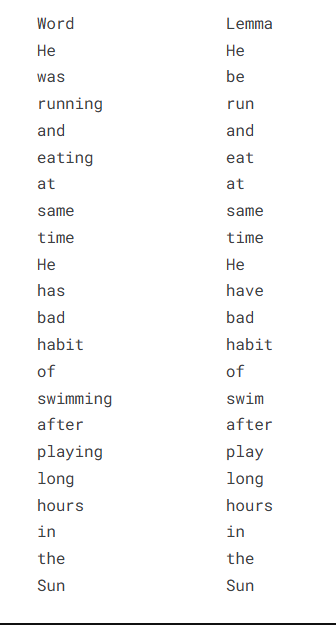